# Feature Selection

In [5]:
import sys
sys.path.insert(0, './../')
from preprocessing import TraceStats, BatchStats
from estimators import GT, AE, GEE, UJ2A, SGD, PA
from visualization import df_to_pdf
from scipy.stats import linregress
import pandas as pd
import pylatex as pl

datapath = '/Users/yuvalnezri/PycharmProjects/CardEst/data/'
output_path = '/Users/yuvalnezri/TexStudio/CardEst/img/'
output_format = 'pdf'

import matplotlib.pyplot as plt

%matplotlib inline

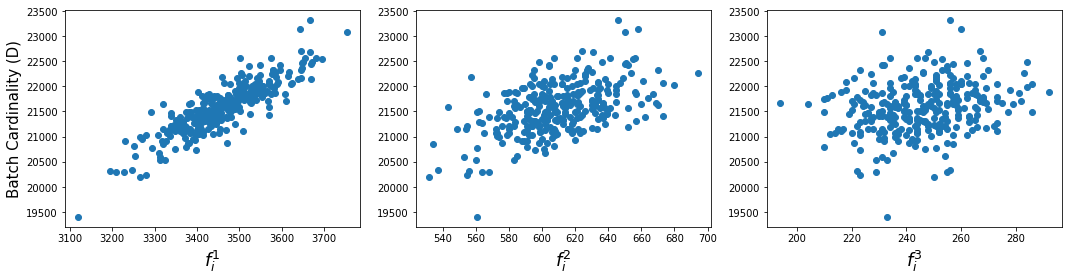

In [7]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()

f, (ax1,ax2,ax3)  = plt.subplots(1,3, figsize = (15,4))

ax1.scatter(df['f_1'], df['batch_card'])
ax1.set_xlabel('$f_i^1$', fontsize=18)
ax1.set_ylabel('Batch Cardinality (D)', fontsize=15)

ax2.scatter(df['f_2'], df['batch_card'])
ax2.set_xlabel('$f_i^2$', fontsize=18)

ax3.scatter(df['f_3'], df['batch_card'])
ax3.set_xlabel('$f_i^3$', fontsize=18)


plt.tight_layout()

plt.savefig(output_path + 'f_i_correlation_10.%s' % output_format, format=output_format)

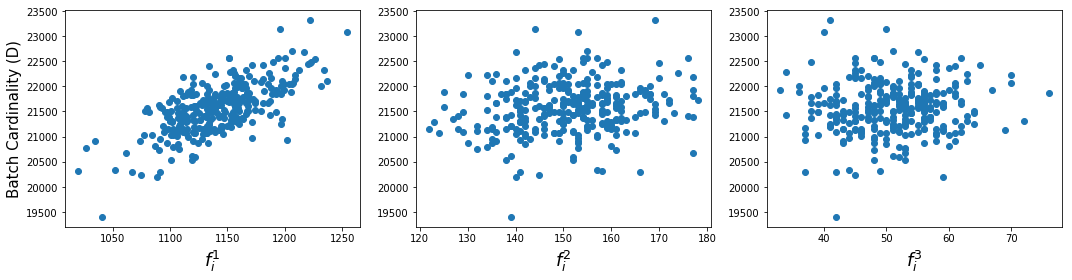

In [8]:
trace = 'caida-2016'
sampling_rate = 0.02

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()

f, (ax1,ax2,ax3)  = plt.subplots(1,3, figsize = (15,4))

ax1.scatter(df['f_1'], df['batch_card'])
ax1.set_xlabel('$f_i^1$', fontsize=18)
ax1.set_ylabel('Batch Cardinality (D)', fontsize=15)

ax2.scatter(df['f_2'], df['batch_card'])
ax2.set_xlabel('$f_i^2$', fontsize=18)

ax3.scatter(df['f_3'], df['batch_card'])
ax3.set_xlabel('$f_i^3$', fontsize=18)


plt.tight_layout()

plt.savefig(output_path + 'f_i_correlation_2.%s' % output_format, format=output_format)

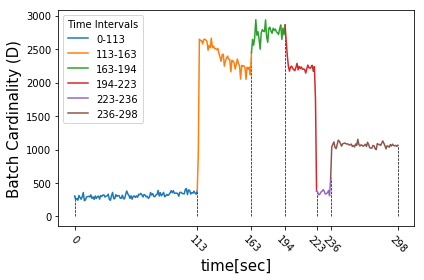

In [9]:
trace = 'darpa-ddos'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)

del(ts.batch_list[219])
ts.batch_count-=1

df = ts.to_df()

intervals = [0,113,163,194,223,236,298]

for i in range(len(intervals)-1):
    temp = df.iloc[intervals[i]:intervals[i+1]+1]
    temp.batch_card.plot(label='%d-%d' % (intervals[i],intervals[i+1]))
for i in range(len(intervals)):
    plt.vlines(x=intervals[i], ymin= 0, ymax=df.iloc[intervals[i]].batch_card, color='k', linestyle='--', lw=0.7)
plt.legend(loc=2, title='Time Intervals')
plt.xticks(intervals, rotation=-45)
plt.xlabel('time[sec]', fontsize=15)
plt.ylabel('Batch Cardinality (D)', fontsize=15)
plt.tight_layout()
plt.savefig(output_path + 'card_vs_time_darpa.%s' % output_format, format=output_format)

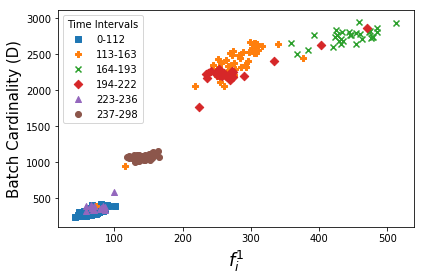

In [10]:
trace = 'darpa-ddos'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)

del(ts.batch_list[219])
ts.batch_count-=1

df = ts.to_df()

intervals = [(0,112),(113,163),(164,193),(194,222),(223,236),(237,298)]
markers = ['s', 'P', 'x', 'D', '^', 'o']
for i in range(len(intervals)):
    temp = df.iloc[intervals[i][0]:intervals[i][1]+1]
    plt.scatter(temp.f_1, temp.batch_card, label='%d-%d' % (intervals[i][0],intervals[i][1]), marker=markers[i])
plt.legend(title='Time Intervals')
plt.xlabel('$f_i^1$', fontsize=18)
plt.ylabel('Batch Cardinality (D)', fontsize=15)
plt.tight_layout()
plt.savefig(output_path + 'f1_vs_card_darpa.%s' % output_format, format=output_format)

In [11]:
trace = 'darpa-ddos'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)

del(ts.batch_list[219])
ts.batch_count-=1

df = ts.to_df()

intervals = [(0,112),(113,163),(164,193),(194,222),(223,236),(237,298)]


features = ['f_1']
rows = []

for i in range(len(intervals)):
    temp = df.iloc[intervals[i][0]:intervals[i][1]+1]
    for feature in features:
        slope, intercept, pearson, _ , _= linregress(temp[feature], temp.batch_card)
        rows.append((trace, sampling_rate, intervals[i], feature, slope, intercept, pearson))
        
df = pd.DataFrame.from_records(rows, columns = ['trace', 'sampling_rate', 'Interval', 'feature',
                                                'Slope', 'Intercept', 'Pearson Coefficient'] )

df = df[(df['sampling_rate'] == 0.1) & (df['trace'] == 'darpa-ddos') &(df['feature'] == 'f_1')]
df = df[['Interval', 'Slope', 'Intercept', 'Pearson Coefficient']]


df_to_pdf(df, 'pearson', print_index=False, digit_round=2, comma_separated_columns=['Intercept'],
          gen_latex=True)
df

,Interval,Slope,Intercept,Pearson Coefficient
0,"(0, 112)",2.487790,144.172844,0.680921
1,"(113, 163)",7.567945,261.500211,0.905755
2,"(164, 193)",1.843295,1928.538753,0.665554
3,"(194, 222)",2.983719,1431.398385,0.870568
4,"(223, 236)",2.991998,149.881885,0.540075
5,"(237, 298)",1.205162,895.084995,0.431736


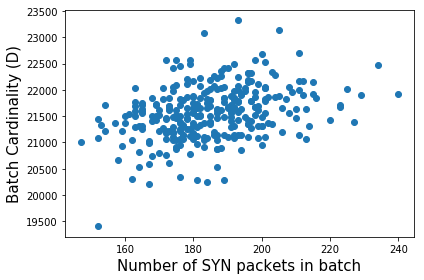

In [12]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()

plt.scatter(df.syn_count, df.batch_card)
plt.xlabel('Number of SYN packets in batch', fontsize=15)
plt.ylabel('Batch Cardinality (D)', fontsize=15)
plt.tight_layout()
plt.savefig(output_path + 'syn_vs_card_backbone.%s' % output_format, format=output_format)

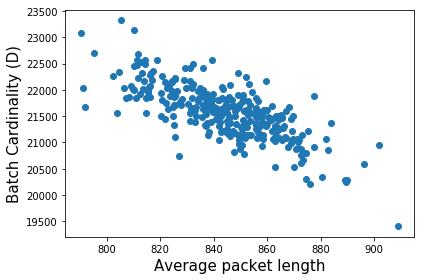

In [13]:
trace = 'caida-2016'
sampling_rate = 0.1

ts = TraceStats.load(datapath + 'feature_selection_' + trace + '_%.4f.pickle' % sampling_rate)
df = ts.to_df()

plt.scatter(df.avg_pkt_len, df.batch_card)
plt.xlabel('Average packet length', fontsize=15)
plt.ylabel('Batch Cardinality (D)', fontsize=15)
plt.tight_layout()
plt.savefig(output_path + 'len_vs_card_backbone.%s' % output_format, format=output_format)